In [1]:
%pylab inline
import pandas as pd
import scipy
from scipy import linalg

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$

# Homework 4
## Homework guideline

- This is a group homework. Your group only needs to submit one homework. You can form a group of 1, 2 or 3.


- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.

- **Late assignments:** Recognizing that students may face unusual circumstances and require some flexibility in the course of the semester, each student will have a total of 7 free late (calendar) days to use as s/he sees fit, but no more than 4 late days can be used on any single assignment. Late days are counted at the granularity of days: e.g., 3 hours late is one late day.  

- **You must write your own code and fill in the your answer in the text box.** If you fail to do either of that, you will receive zero point.



**Your group member:**

- Neeraj Namani - 001616313
- Gayathri Srujana - 001615025
- Anish Reddy Yellakonda - 001607588


---


---



# Q1: K-means clustering (30pt)

In K-means, we are given dataset $\{\mathbf{x}^{(1)}, \dots,\mathbf{x}^{(N)} \}\subset \mathbb{R}^d$ and the number of clusters $K$, and we are trying to optimize the distortion value
$$J = \sum_{i=1}^N\sum_{j=1}^K r_{ij}\|\mathbf{x}^{(i)}-\mu_j\|_2^2$$
where $r_{ij}\in \{0,1\}$ is an indicator variable
$r_{ij}=1 \text{ if and only if } \mathbf{x}^{(i)}\in \mathcal{C}_{j}$. For each $i$, there is one and only one $j$ such that $r_{ij}=1$, i.e., the membership for $\mathbf{x}^{(i)}$ is unique.




## Q1.1  Alternative optimization Steps (10pt)

- Fix $\{\mu_j\}$ and minimize over $\{r_{ij}\}$, **show** the solution for $r_{ij}$ is

$$r_{ij} = \begin{cases} 1 & \text{if } j= \text{arg}\min_k \|\mathbf{x}^{(i)}-\mu_k\|_2^2 \\ 0 & \text{Otherwise}\end{cases}$$

- Fix $\{r_{ij}\}$ and minimize over $\{\mu_j\}$, **show** the solution for $\mu_j$ is  
$$\mu_j=\frac{\sum_i r_{ij}\mathbf{x}^{(i)}}{\sum_i r_{ij}}$$

Please show your derivation.





#Solution:

1. Fix $\mu_j$ and minimize over $r_{ij}$

We are solving the following problem:\
$min_{\{r_{ij}\}} J = \sum_{i=1}^N \sum_{j=1}^K r_{ij} \|\mathbf{x}^{(i)} - \mu_j\|_2^2,
$
where $r_{ij} \in \{0, 1\}$ and each $\mathbf{x}^{(i)}$ is assigned to exactly one cluster.

- Constraint: For each $i $, there is one and only one $ j $ such that $ r_{ij} = 1 $. This means each point $ \mathbf{x}^{(i)} $ is assigned to a single cluster.

To minimize $ J $, we analyze the term:

$
r_{ij} \|\mathbf{x}^{(i)} - \mu_j\|_2^2.
$
Since $r_{ij} \in \{0, 1\} $, the term contributes to $ J $ only when $ r_{ij} = 1 $. Therefore, for a fixed $ i $, to minimize the distortion, we assign $r_{ij} = 1 $ for the cluster $ j $ with the smallest squared distance $||\mathbf{x}^{(i)} - \mu_j\|_2^2 $. For all other clusters $ j' \neq j $, we set $ r_{ij'} = 0 $.

Thus, the solution for $ r_{ij} $ is:
$
r_{ij} =
\begin{cases}
1 & \text{if } j = \arg \min_k \|\mathbf{x}^{(i)} - \mu_k\|_2^2, \\
0 & \text{Otherwise}.
\end{cases}
$


2. Fix  $\{r_{ij}\}$ and minimize over $\{\mu_j\} $

We now fix the cluster assignments $ \{r_{ij}\} $ and minimize $ J $ with respect to $ \{\mu_j\} $:
$
J = \sum_{i=1}^N \sum_{j=1}^K r_{ij} \|\mathbf{x}^{(i)} - \mu_j\|_2^2.
$

Expand the squared norm:
$
\|\mathbf{x}^{(i)} - \mu_j\|_2^2 = (\mathbf{x}^{(i)} - \mu_j)^T (\mathbf{x}^{(i)} - \mu_j) = \|\mathbf{x}^{(i)}\|_2^2 - 2(\mathbf{x}^{(i)})^T\mu_j + \|\mu_j\|_2^2.
$

Since $ r_{ij} $ is fixed and binary, for each cluster $j $, we isolate the terms in $ J $ that depend on $ \mu_j $:
$
\min_{\mu_j} \sum_{i=1}^N r_{ij} \|\mathbf{x}^{(i)} - \mu_j\|_2^2.
$

Focusing on the terms involving $ \mu_j $:
$
\sum_{i=1}^N r_{ij} \|\mathbf{x}^{(i)} - \mu_j\|_2^2 = \sum_{i=1}^N r_{ij} \left[ \|\mathbf{x}^{(i)}\|_2^2 - 2 (\mathbf{x}^{(i)})^T \mu_j + \|\mu_j\|_2^2 \right].
$

Since $ \|\mathbf{x}^{(i)}\|_2^2 $ does not depend on $ \mu_j $, we can ignore it for minimization:
$
\min_{\mu_j} \sum_{i=1}^N r_{ij} \left[ -2 (\mathbf{x}^{(i)})^T \mu_j + \|\mu_j\|_2^2 \right].
$

Reorganizing terms:
$
\min_{\mu_j} \left[ -2 \mu_j^T \sum_{i=1}^N r_{ij} \mathbf{x}^{(i)} + \|\mu_j\|_2^2 \sum_{i=1}^N r_{ij} \right].
$

Let $ \mathbf{S}_j = \sum_{i=1}^N r_{ij} \mathbf{x}^{(i)} $ and $ N_j = \sum_{i=1}^N r_{ij} $, then:
$
\min_{\mu_j} \left[ -2 \mu_j^T \mathbf{S}_j + \|\mu_j\|_2^2 N_j \right].
$

To minimize, take the gradient with respect to $ \mu_j $ and set it to 0:
$
\frac{\partial}{\partial \mu_j} \left[ -2 \mu_j^T \mathbf{S}_j + \|\mu_j\|_2^2 N_j \right] = -2 \mathbf{S}_j + 2 N_j \mu_j = 0.
$

Solve for $ \mu_j $:
$
\mu_j = \frac{\mathbf{S}_j}{N_j} = \frac{\sum_{i=1}^N r_{ij} \mathbf{x}^{(i)}}{\sum_{i=1}^N r_{ij}}.
$






---


## Q1.2 MNIST: Implementation (10pt)
The objective function in  K-means to minimize is
$$ \min_{\mu\in\mathbb{R}^{d\times K}}\sum_{j=1}^K \sum_{\mathbf{x}^{(i)}\in \mathcal{C}_j}\|\mathbf{x}^{(i)}-\mu_j\|^2$$

The Lloyd’s algorithm, the commonly-used heuristic which we discussed in lecture, typically works well to minimize this objective function. You need to use the function implemented in class.

In [2]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
Xtr                   = train_X[0:6000, :]
train_y_part          = train_y[0:6000]
Xte                   = test_X[0:1000,:]
test_y_part           = test_y[0:1000]

Run the Lloyd's algorithm on the training dataset of MNIST with $K = 10$, plotting the objective function as a function of the iteration number.  Visualize (and include in your report) the cluster centers as a $28 \times 28$ image.

Converged at iteration: 38


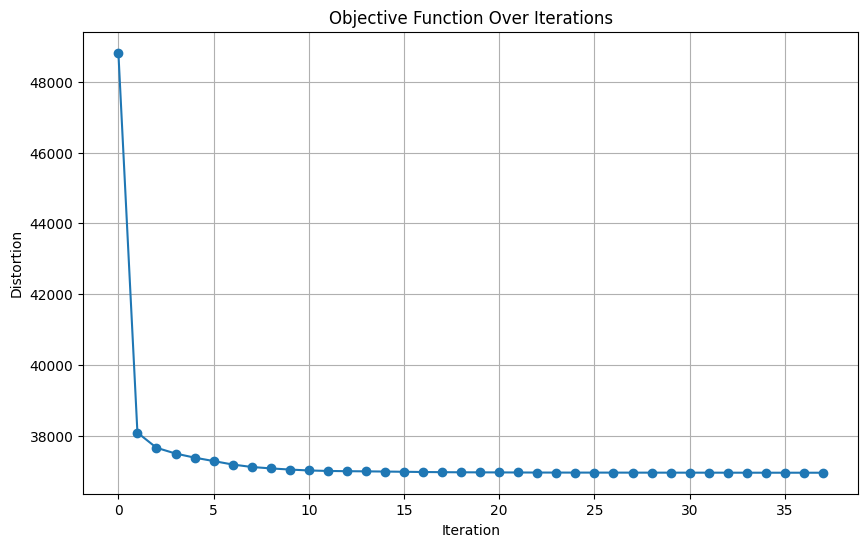

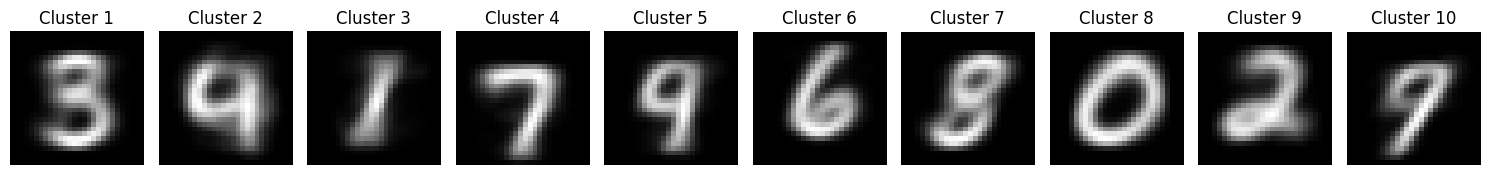

In [3]:
# Q1.2 your code starts here

Xtr = train_X[0:6000].reshape(6000, -1) / 255.0  # Flatten and normalize
Xte = test_X[0:1000].reshape(1000, -1) / 255.0  # Flatten and normalize

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def mykmeans(X, K, max_iter=100, plot_steps=False):
    n_samples, n_features = X.shape
    # Step 0: Initialize centroids randomly
    random_sample_idxs = np.random.choice(n_samples, K, replace=False)
    centroids = X[random_sample_idxs]

    # Track distortion
    distortion_list = []

    for j in range(max_iter):
        # Step 1: Assign samples to closest centroids
        clusters = [[] for _ in range(K)]
        distortion_curr = 0
        for idx, sample in enumerate(X):
            distances = [euclidean_distance(sample, centroid) for centroid in centroids]
            closest_idx = np.argmin(distances)
            clusters[closest_idx].append(idx)
            distortion_curr += min(distances)

        distortion_list.append(distortion_curr)

        # Step 2: Update centroids
        centroids_old = centroids.copy()
        centroids = np.zeros((K, n_features))
        for cluster_idx, cluster in enumerate(clusters):
            if len(cluster) > 0:
                cluster_mean = np.mean(X[cluster], axis=0)
                centroids[cluster_idx] = cluster_mean

        # Step 3: Check for convergence
        if np.allclose(centroids, centroids_old):
            print("Converged at iteration:", j + 1)
            break

    return centroids, distortion_list

# Run K-means
K = 10
centroids, distortion_list = mykmeans(Xtr, K)

# Plot distortion
plt.figure(figsize=(10, 6))
plt.plot(distortion_list, marker='o')
plt.title('Objective Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Distortion')
plt.grid()
plt.show()

# Visualize centroids as 28x28 images
centroid_images = centroids.reshape(K, 28, 28)
fig, axes = plt.subplots(1, K, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(centroid_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Cluster {i+1}")
plt.tight_layout()
plt.show()




---


## Q1.3: MNIST: find optimal $K$ (10pt)
For $K = \{2, 4, 8, 16, 32\}$, run the  Lloyd's  algorithm on the training dataset to obtain centers $\{\mu_j\}_{j=1}^K$. If $\{\mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^{6000}$ and $\{\mathbf{x}'^{(j)}, y'^{(j)}\}_{j=1}^{1000}$ denote the training and test sets, respectively, plot the training error and test error (defined below) as a function of $K$ on the same
plot.
\begin{align}
&\text{Training Error: } \frac{1}{6000}\sum_{i=1}^{6000} \min_{k=1,\dots,K} \|\mu_k -\mathbf{x}^{(i)}\|_2^2\\
& \text{Testing Error: } \frac{1}{1000}\sum_{j=1}^{1000} \min_{k=1,\dots,K} \|\mu_k -\mathbf{x}'^{(j)}\|_2^2\\
\end{align}

You need to use the function implemented in class.

Running K-means for K=2...
Running K-means for K=4...
Running K-means for K=8...
Running K-means for K=16...
Running K-means for K=32...


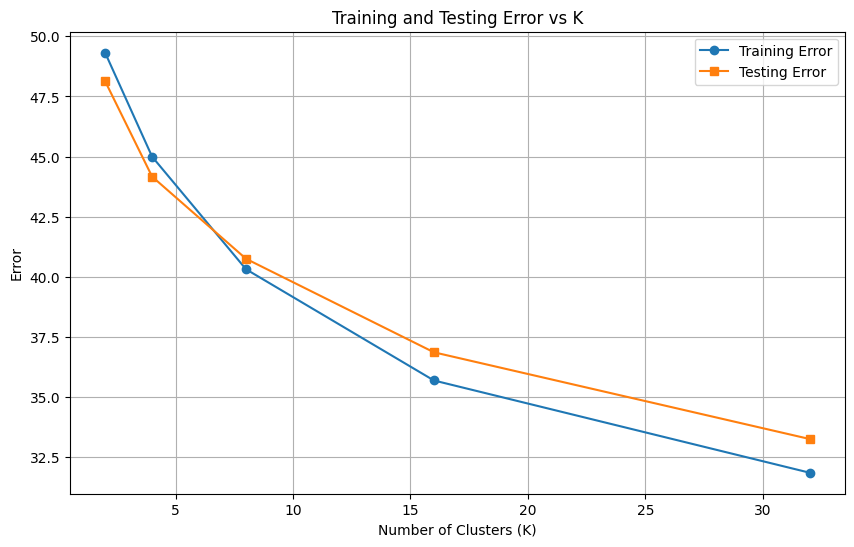

In [4]:
# Q1.3

# Preprocess data
Xtr = train_X[0:6000].reshape(6000, -1) / 255.0  # Flatten and normalize
Xte = test_X[0:1000].reshape(1000, -1) / 255.0  # Flatten and normalize

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def mykmeans(X, K, max_iter=100):
    n_samples, n_features = X.shape
    # Initialize centroids randomly
    random_sample_idxs = np.random.choice(n_samples, K, replace=False)
    centroids = X[random_sample_idxs]

    for _ in range(max_iter):
        # Step 1: Assign samples to closest centroids
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        closest = np.argmin(distances, axis=0)

        # Step 2: Update centroids
        centroids_old = centroids
        centroids = np.array([X[closest == k].mean(axis=0) for k in range(K)])

        # Step 3: Check for convergence
        if np.allclose(centroids, centroids_old):
            break

    return centroids

def compute_error(X, centroids):
    # Compute mean squared distance of points to their closest centroid
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    min_distances = np.min(distances, axis=0)
    return np.mean(min_distances**2)

# Define K values
K_values = [2, 4, 8, 16, 32]

# Store errors
train_errors = []
test_errors = []

# Run K-means for each K
for K in K_values:
    print(f"Running K-means for K={K}...")
    centroids = mykmeans(Xtr, K)
    train_error = compute_error(Xtr, centroids)
    test_error = compute_error(Xte, centroids)
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot training and testing errors
plt.figure(figsize=(10, 6))
plt.plot(K_values, train_errors, marker='o', label='Training Error')
plt.plot(K_values, test_errors, marker='s', label='Testing Error')
plt.title('Training and Testing Error vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()




---



---

# Q2: NYC Parking (35pt)

As part of the effort of NYC to make its data publicly available and accessible, the city releases every month the full list of all taxi rides around the city. We will be using the dataset from January 2016, which can be found [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

The full dataset includes over 10M taxi rides. In our course, we will be using a smaller subset of this dataset with only 100k rides (which has also been cleaned up a bit). We will start by loading the data and printing the 10 first rows.

In this homework we will only be interested in the following columns:

- **dropoff_easting** - The horizontal coordinate (east-west) (in UTM-WGS84 (~ in kilometers))
- **dropoff_northing** - The vertical coordinate (north-south) (in UTM-WGS84 (~ in kilometers))

(A full description for each of the other columns can be found [here](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf))

Define the $2\times N$ array $X$ of drop off locations.

In [5]:
!wget https://github.com/yexf308/MAT592/raw/main/homework/HW3/nyc_taxi_rides.csv?raw=true -O nyc_taxi_rides.csv

--2024-11-21 00:46:50--  https://github.com/yexf308/MAT592/raw/main/homework/HW3/nyc_taxi_rides.csv?raw=true
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/yexf308/MachineLearning/raw/main/homework/HW3/nyc_taxi_rides.csv?raw=true [following]
--2024-11-21 00:46:50--  https://github.com/yexf308/MachineLearning/raw/main/homework/HW3/nyc_taxi_rides.csv?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MachineLearning/main/homework/HW3/nyc_taxi_rides.csv [following]
--2024-11-21 00:46:51--  https://raw.githubusercontent.com/yexf308/MachineLearning/main/homework/HW3/nyc_taxi_rides.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.gi

In [6]:
dataset = pd.read_csv('nyc_taxi_rides.csv')

## Print the number of rows in the data set
number_of_rows = len(dataset)
print('Number of rows in the dataset: N={}'.format(number_of_rows))

## Show the first 5 rows and last 5 rows
dataset

Number of rows in the dataset: N=100000


,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,pickup_easting,pickup_northing,dropoff_easting,dropoff_northing,duration,day_of_week,day_of_month,time_of_day
0,2,2.768065,2,9.5,0.00,586.996941,4512.979705,588.155118,4515.180889,11.516667,3,13,12.801944
1,1,3.218680,2,10.0,0.00,587.151523,4512.923924,584.850489,4512.632082,12.666667,6,16,20.961389
2,1,2.574944,1,7.0,2.49,587.005357,4513.359700,585.434188,4513.174964,5.516667,0,31,20.412778
3,1,0.965604,1,7.5,1.65,586.648975,4511.729212,586.671530,4512.554065,9.883333,1,25,13.031389
4,1,2.462290,1,7.5,1.66,586.967178,4511.894301,585.262474,4511.755477,8.683333,2,5,7.703333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,3.218680,2,8.0,0.00,586.185469,4513.033744,585.468560,4510.530082,6.400000,4,28,6.925000
99996,5,1.142631,1,4.0,1.32,585.765009,4512.580782,585.200602,4511.590442,1.666667,1,25,5.041667
99997,1,5.471756,2,12.5,0.00,587.498875,4512.905997,591.728405,4512.904235,11.666667,6,9,15.407500
99998,1,3.894603,1,11.5,2.00,589.082301,4511.109238,591.331933,4513.822199,14.383333,5,1,21.158889


In [7]:
X = dataset[['dropoff_easting','dropoff_northing']].values
print('The first 10 rows in X are:\n{}'.format(X[:10, :]))

The first 10 rows in X are:
[[ 588.15511774 4515.18088924]
 [ 584.85048892 4512.63208213]
 [ 585.43418784 4513.17496388]
 [ 586.67153039 4512.55406531]
 [ 585.26247362 4511.75547748]
 [ 585.16897267 4511.54010337]
 [ 588.71017492 4514.20918449]
 [ 585.84396658 4509.54508925]
 [ 583.67108081 4507.73557339]
 [ 587.7012478  4513.70969066]]


In [8]:
X.shape

(100000, 2)

The following code plots the map of drop off points. The figure you got resembles the shape of the
streets in NYC: [map](https://www.google.com/maps/@40.7328589,-73.9545177,13z)

Text(0.5, 1.0, 'Dropoffs')

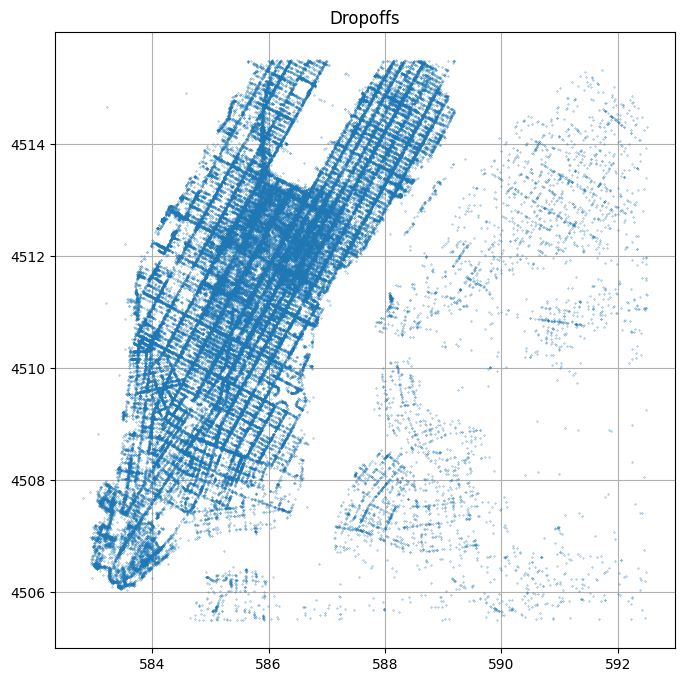

In [9]:
## Plot the map
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(X[:, 0], X[:, 1], '.', markersize=0.5);
ax.set_title('Dropoffs')



---


## Q2.1: Finding The Optimal Parking Lots Locations (15pt)
A NY taxi company is looking to rent $K$ parking lots so that their taxis can wait in them in between rides.

It would like to select the optimal locations to place these parking lots such that the average distance from the drop off location to the nearest parking lot will be minimal.

In class, we have searched for the best $K$ locations which will minimize the $L_2$ (Euclidean) distances, but actually, in the case of NYC, it makes more sense to minimize the $L_1$ distance.

In order for the L1 distance to actually be the ride distance, we need to rotate the map such that the streets of NYC will be parallel to the axis.


---


### Rotating the map (5pt)
Rotate the array of drop off points $x$ such that:
- The streets of NYC (going from South-East to North-West) will be parallel to the x axis
- The Avenues of NYC (going from South-west to North-East) will be parallel to the y axis.

Do so by constructing a rotation matrix, and multiply $x$ by that matrix to get the rotated drop off points.

Use the following:

- A normalized vector pointing in a direction parallel to the avenues of NYC:

$$
\boldsymbol{e}_1=\left(0.88, -0.47\right)^T
$$

- A normalized vector pointing in a direction parallel to the streets of NYC:
$$
\boldsymbol{e}_2=\left(0.47, 0.88\right)^T
$$

Make sure that that the streets are now more or less aligned to $x$ and $y$ axis.


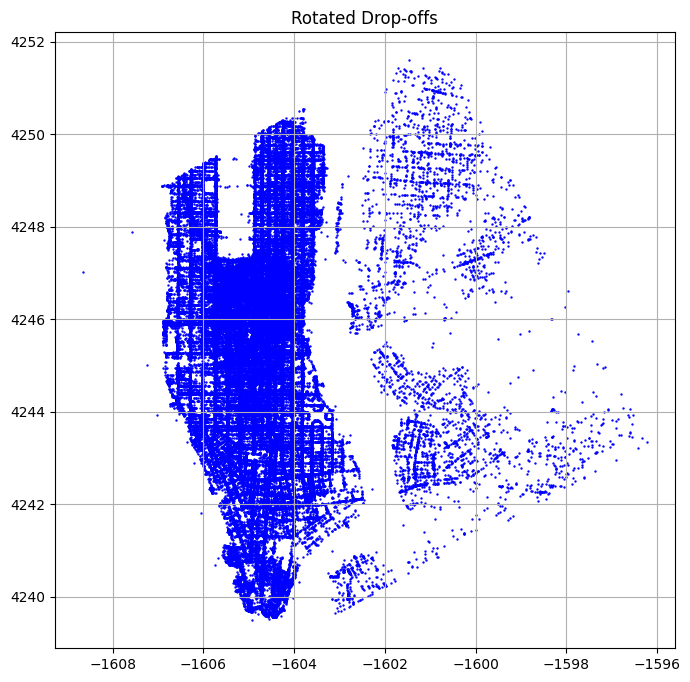

In [10]:
# your code starts here

# Define the rotation matrix for aligning streets and avenues
e1 = np.array([0.88, -0.47])  # Avenue direction vector
e2 = np.array([0.47, 0.88])   # Street direction vector
R = np.column_stack((e1, e2))  # Construct the rotation matrix

# Assume X contains the dropoff_easting and dropoff_northing columns from the dataset
# Replace this with your actual dataset values
X = dataset[['dropoff_easting', 'dropoff_northing']].values

# Rotate the drop-off points using the rotation matrix
X_rotated = np.dot(X, R)

# Extract the rotated x and y coordinates
X_rotated_x = X_rotated[:, 0]
X_rotated_y = X_rotated[:, 1]

# Plot the rotated drop-off points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.scatter(X_rotated_x, X_rotated_y, s=0.5, color='blue')
ax.set_title('Rotated Drop-offs')
plt.show()




---


### The K-Medians algorithm (10pt)

Similar to the K-Means algorithm, which tries to minimize the sum of squared $L_2$ distances between each point and one of the $K$ centers, there is also a K-Medians algorithm which tries to minimize the sum of $L_1$ distances.

As we saw for the case of the $L_2$, the center point which minimizes the sum of squared $L_2$ distances from a given set of points, is the **mean** point of the given points.

Equivalently, the center point which minimizes the sum of $L_1$ distances from a given set of points is the point which is **median** (in each one of the axis) of the given points.

### The Algorithm

The K-Medians algorithm differs from the K-means algorithm in the following way:

1. The assignment of each point the nearest center will now be based upon the $L_1$ distance instead of the $L_2$ distance.
2. The center will be now calculated using the Median value insted of Mean value.

(a) **Modify K-means code** so that it will implement the K-Medians algorithm with $K=5$. You may use `cdist` to speed up the calculation.

(b) Write a separate function to plot the clusters.



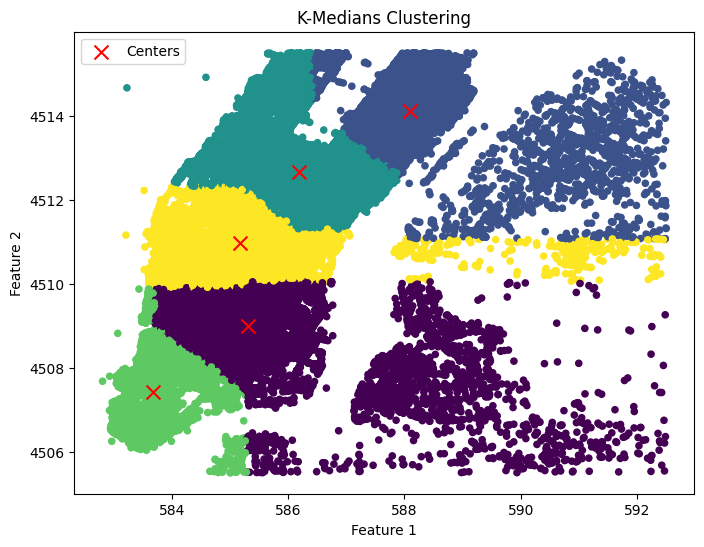

In [11]:
# Your code starts here

from scipy.spatial.distance import cdist


def k_medians(X, K=5, max_iters=100):
    # Randomly initialize the cluster centers
    centers = X[np.random.choice(X.shape[0], K, replace=False)]

    for _ in range(max_iters):
        # Compute the L1 distance (Manhattan distance) between each point and each center
        dist = cdist(X, centers, metric='cityblock')

        # Assign each point to the nearest center (based on L1 distance)
        labels = np.argmin(dist, axis=1)

        # Recompute the centers as the median of the points in each cluster
        new_centers = np.array([np.median(X[labels == k], axis=0) for k in range(K)])

        # If the centers don't change, we stop
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

def plot_clusters(X, centers, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centers')
    plt.title('K-Medians Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Example usage:
# X = dataset[['dropoff_easting', 'dropoff_northing']].values  # Use your dataset
centers, labels = k_medians(X, K=5)  # Assuming X is your data array
plot_clusters(X, centers, labels)





---




## Q2.2: Finding The Optimal Number of Parking Lots (20pt)



Now let us address the topic of selecting the number of parking lots (the number of clusters)

Basically, to reduce the average ride distance we would like as much parking lots as possible, but in practice operating a parking lots cost money. Let us assume that:

1. The price of operating a parking lot is 10k\\$ per month.

2. There will be exactly 100k rides to the parking lots per month.

3. The estimated price per kilometer for when driving to the parking is estimated at 3$ / kilometer.

Basically, we would now like to minimize the following risk function, which is the monthly cost (in k$) of operating the parking lots plus the cost of driving to them:

$$
\hat{R}\left(\left\{\boldsymbol{c}_i\right\}, K\right)= 10\cdot K+3 \cdot 100\cdot\frac{1}{N}\sum_{i=1}^K\sum_{\boldsymbol{x}_j\in S_i}\left\lVert\boldsymbol{x}_j-\boldsymbol{c}_i\right\rVert_1
$$

Where:

- $K$ is the number of parking lots.
- $\left\{\boldsymbol{c}_i\right\}$ is the locations of the $K$ parking lots.
- $N$ is the number of rides in the dataset.
- $\left\{\boldsymbol{x}_i\right\}$ is the set of dropping points in the data set.
- $S_i$ is the set of dropping points which are assigned to the $i$-th parking lot.


---



### Calculate risk (5pt)
Complete the following code to calculate for calculating the risk function.



In [12]:
def calc_risk(parking_lots_locations, x, cost_per_parking, cost_per_average_distance):
    # Calculate the number of rides
    N = x.shape[0]

    # Calculate the L1 distance between each drop-off point and each parking lot
    dist = cdist(x, parking_lots_locations, metric='cityblock')

    # Assign each point to the nearest parking lot
    labels = np.argmin(dist, axis=1)

    # Calculate the sum of L1 distances for each parking lot
    total_distance = 0
    for i in range(parking_lots_locations.shape[0]):
        cluster_points = x[labels == i]
        total_distance += np.sum(cdist(cluster_points, parking_lots_locations[i:i+1], metric='cityblock'))

    # Calculate the risk function
    risk = 10 * len(parking_lots_locations) + (3 * 100 / N) * total_distance

    return risk


In [13]:
parking_lots_locations = np.array([[586, 4512], [587, 4514], [585, 4511], [586, 4513], [587, 4510]])
cost_per_parking = 10
cost_per_avarage_distance = 300

risk = calc_risk(parking_lots_locations, X_rotated, cost_per_parking, cost_per_avarage_distance)
print(risk)

736656.795918862




---





### Brute force optimization (15pt)

We will find the optimal $K$ simply be checking all the relevant values of $K$. For this case, we will check all $K$'s between 1 and 30.

We will split data (80% train, 20% test) for selecting the optimal $K$.


Complete the following code to split the data and calculate the risks for $K=1,2,3,...,30$.

- For each $K$, use the training data to find the $K$ parking lots locations.

- Use the test dataset to calculate the risk.


In [14]:
# your code starts here.

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Range of K values from 1 to 30
K_values = range(1, 31)

# Store the risks for each K
risks = []

# Brute-force search for optimal K
for K in K_values:
    # Use K-Medians or K-Means to find the K parking lots locations (centroids)
    centers, labels = k_medians(X_train, K)  # Replace `k_medians` with your clustering function

    # Calculate the risk using the test dataset
    risk = calc_risk(centers, X_test, cost_per_parking=10, cost_per_average_distance=3)

    # Store the risk for this K
    risks.append(risk)

# Find the optimal K (the one with the lowest risk)
optimal_K = K_values[np.argmin(risks)]

# Print the optimal K and corresponding risk
print(f"Optimal K: {optimal_K}")
print(f"Risk for optimal K: {min(risks)}")


Optimal K: 11
Risk for optimal K: 359.98544695542535




---



---



# Q3: Gaussian Mixture Models (35pt)
## Q3.1  KL divergence (5pt)
In class, we defined the **Kullback-Leibler divergence** (or **KL divergence** for short) between two probability distributions $q$ and $p$,
$$ \text{KL}(q||p)=\sum_{z=1}^K q(z) \log\left( \frac{q(z)}{p(z)}\right)$$
where $\sum_{z=1}^K q(z)=1$ and $\sum_{z=1}^K p(z)=1$. For simplicity, assume $p(z)>0$ for all $z$.

Please show the following two key properties
- $\text{KL}(q||p)\ge 0$

- $\text{KL}(q||p)=0$ iff $p=q$.

# Your Solution:

1. $ \text{KL}(q || p) \geq 0 $

Proof:
Using the inequality $ \log(x) \leq x - 1 $ for
$( x > 0 )$, we can show that $x \log(x) \geq x - 1 $.  
Rewriting the KL divergence:

$
\text{KL}(q || p) = \sum_{z=1}^K q(z) \log\left(\frac{q(z)}{p(z)}\right).
$

Substitute $ \log(a/b) = \log(a) - \log(b) $:
$
\text{KL}(q || p) = \sum_{z=1}^K q(z) \left(\log(q(z)) - \log(p(z))\right).
$
Split the summation:
$
\text{KL}(q || p) = \sum_{z=1}^K q(z) \log(q(z)) - \sum_{z=1}^K q(z) \log(p(z)).
$

Relating to Jensen's Inequality:
- $ -\sum_{z=1}^K q(z) \log(p(z)) $ is the **cross-entropy**, while $ \sum_{z=1}^K q(z) \log(q(z)) $ is the **entropy** of $q $.
- Jensen's inequality states that for a convex function $ f $, $ f(\mathbb{E}[X]) \leq \mathbb{E}[f(X)] $.

 Applying this to $ \log $, we have:
$
\mathbb{E}_{q}\left[\log(p(z))\right] \leq \log\left(\mathbb{E}_{q}[p(z)]\right),
$
which ensures that $ \text{KL}(q || p) \geq 0 $.

2. $ \text{KL}(q || p) = 0 \iff q = p $

From the definition:
$
\text{KL}(q || p) = \sum_{z=1}^K q(z) \log\left(\frac{q(z)}{p(z)}\right).
$
- If $ q(z) = p(z) $ for all $ z $, then $ \frac{q(z)}{p(z)} = 1 $, and $ \log(1) = 0 $. Thus:
$
\text{KL}(q || p) = \sum_{z=1}^K q(z) \cdot 0 = 0.
$

To prove the converse, assume $ \text{KL}(q || p) = 0 $. For $ \text{KL}(q || p) $ to be zero:
$
q(z) \log\left(\frac{q(z)}{p(z)}\right) = 0 \quad \forall z.
$
- This implies that either $ q(z) = 0 $ or $\log\left(\frac{q(z)}{p(z)}\right) = 0 $, which means $ q(z) = p(z) $.
- Since $ \sum_{z=1}^K q(z) = 1 $ and $ \sum_{z=1}^K p(z) = 1 $, $ q(z) = p(z) $ for all z.

$
\text{KL}(q || p) = 0 \quad \text{iff} \quad q = p.
$





---

## Q3.2 Analytical solutions (10pt)
Show the following results,
- \begin{align}
\hat\pi_k=\arg\max_{ \pi_k} \sum_{i=1}^N \phi_{k}^{(i)} \log \pi_k = \frac{1}{N}\sum_{i=1}^N \phi_{k}^{(i)}
\end{align}
with the constraint that $\sum_{k}\pi_k=1$ and $0\le \pi_k\le 1$

- \begin{align}
(\hat{\mm\mu}_k, \hat{\mm\Sigma}_k)=\arg\max_{ \mm\mu_k, \mm\Sigma_k} \sum_{i=1}^N \phi_{k}^{(i)} \log p(\mathbf{x}^{(i)} |\mm\mu_k, \mm\Sigma_k) = \left(\frac{\sum_{i=1}^N \phi_{k}^{(i)}  \mathbf{x}^{(i)}}{\sum_{i=1}^N \phi_{k}^{(i)}}, \frac{\sum_{i=1}^N \phi_{k}^{(i)}  \left[\mathbf{x}^{(i)}-\hat{\mm\mu}_k\right]\left[\mathbf{x}^{(i)}-\hat{\mm\mu}_k\right]^T}{\sum_{i=1}^N \phi_{k}^{(i)}}\right)
\end{align}


# Your Solution:

### 1. Solution for $ \hat{\pi}_k $

We are tasked with showing:
$
\hat\pi_k = \arg\max_{\pi_k} \sum_{i=1}^N \phi_k^{(i)} \log \pi_k = \frac{1}{N} \sum_{i=1}^N \phi_k^{(i)},
$
where the constraint is $ \sum_k \pi_k = 1 $ and $ 0 \leq \pi_k \leq 1 $.

Proof: \
The objective is to maximize:
$
\mathcal{L}(\pi_k) = \sum_{i=1}^N \phi_k^{(i)} \log \pi_k.
$

To do this, we take the derivative of $ \mathcal{L}(\pi_k) $ with respect to $ \pi_k $:
$
\frac{d}{d\pi_k} \mathcal{L}(\pi_k) = \sum_{i=1}^N \frac{\phi_k^{(i)}}{\pi_k}.
$
Setting this derivative equal to zero to find the maximum:
$
\sum_{i=1}^N \frac{\phi_k^{(i)}}{\pi_k} = 0.
$
This yields the solution:
$
\pi_k = \frac{1}{N} \sum_{i=1}^N \phi_k^{(i)}.
$

Thus, the solution for $ \hat{\pi}_k $ is:
$
\hat\pi_k = \frac{1}{N} \sum_{i=1}^N \phi_k^{(i)}.
$

The constraint $ \sum_k \pi_k = 1 $ is naturally satisfied since $ \sum_k \hat{\pi}_k = 1 $ due to the nature of the probabilities $ \phi_k^{(i)} $, and $0 \leq \pi_k \leq 1 $ is also satisfied.

### 2. Solution for $ \hat{\mu}_k $ and $ \hat{\Sigma}_k $

Proof:

We aim to maximize the log-likelihood function with respect to $ \mu_k $ and $ \Sigma_k $:
$
\mathcal{L}(\mu_k, \Sigma_k) = \sum_{i=1}^N \phi_k^{(i)} \log p(\mathbf{x}^{(i)} | \mu_k, \Sigma_k).
$

The likelihood function for a Gaussian distribution is given by:
$
p(\mathbf{x}^{(i)} | \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x}^{(i)} - \mu_k)^T \Sigma_k^{-1} (\mathbf{x}^{(i)} - \mu_k) \right).
$

We can now maximize the log-likelihood for $ \mu_k $ and $ \Sigma_k $. First, we compute the derivative of the log-likelihood with respect to $ \mu_k $. Setting the derivative to zero, we find the following result for the mean:
$
\hat{\mu}_k = \frac{\sum_{i=1}^N \phi_k^{(i)} \mathbf{x}^{(i)}}{\sum_{i=1}^N \phi_k^{(i)}}.
$

Next, we compute the derivative with respect to $ \Sigma_k $. Setting the derivative to zero, we get the following result for the covariance matrix:
$
\hat{\Sigma}_k = \frac{\sum_{i=1}^N \phi_k^{(i)} \left[ \mathbf{x}^{(i)} - \hat{\mu}_k \right] \left[ \mathbf{x}^{(i)} - \hat{\mu}_k \right]^T}{\sum_{i=1}^N \phi_k^{(i)}}.
$

Thus, the analytical solution for $ \hat{\mu}_k $ and $ \hat{\Sigma}_k $ is:
$
(\hat{\mu}_k, \hat{\Sigma}_k) = \left( \frac{\sum_{i=1}^N \phi_k^{(i)} \mathbf{x}^{(i)}}{\sum_{i=1}^N \phi_k^{(i)}}, \frac{\sum_{i=1}^N \phi_k^{(i)} \left[ \mathbf{x}^{(i)} - \hat{\mu}_k \right] \left[ \mathbf{x}^{(i)} - \hat{\mu}_k \right]^T}{\sum_{i=1}^N \phi_k^{(i)}} \right).
$




---

## Q3.3. Construct a function to calculate log likelihood (5pt)
Say you have applied EM algorithm in the Gaussian Mixture model and have found the optimal parameter $\hat{\mm\theta}=\{\hat\pi_k, \hat{\mm\mu}_k, \hat{\mm\Sigma}_k\}_{k=1}^K$. Construct a function to calculate the log likelihood $\ell(\theta)$

In [15]:
#  Q3.3 your code starts here
def log_likelihood(X,K,Pi_opt,Mu_opt, Sigma_opt):
  N, d = X.shape  # Number of data points and dimensionality
  log_likelihood = 0.0

  for i in range(N):
      # Compute the mixture density for each data point by summing over components
      mixture_density = 0.0
      for k in range(K):
          # Compute the Gaussian density for component k at point X[i]
          diff = X[i] - Mu_opt[k]
          exponent = -0.5 * diff.T @ np.linalg.inv(Sigma_opt[k]) @ diff
          coeff = Pi_opt[k] / ((2 * np.pi) ** (d / 2) * np.linalg.det(Sigma_opt[k]) ** 0.5)
          mixture_density += coeff * np.exp(exponent)

      # Update the log-likelihood sum with the log of the mixture density for X[i]
      log_likelihood += np.log(mixture_density)
  return log_likelihood



---





---



## Q3.4 BIC (10pt)

In Gaussian mixture models, one question is how to choose the number of the cluster $K$. We will use slightly more complicated criterion, Bayesian information criterion (BIC).

Remember the definition of BIC is
\begin{align}
\mr{BIC}(K) = \log p(D|\hat{\mm\theta})-\frac{d_K}{2}\log(N)
\end{align}
The first term is the log-likelihood $\log\ell(\hat{\mm\theta})$, $d_K$ is the number of free parameters in the model and $N$ is the number of samples. Overall, the higher BIC value, the better of the model.

What is $d_K$ in GMM for $K$ clusters?
Please construct a function to calculate the Bayesian information criterion.


# Your Solution:

In [16]:
#  Q3.4 your code starts here
def calculate_bic(log_likelihood, K, N, d):
  d_K = (K - 1) + K * d + K * (d * (d + 1)) / 2

  # Calculate BIC using the formula
  bic = log_likelihood - (d_K / 2) * np.log(N)
  return bic



---




## Q3.5. Testing with the synthetic dataset (5pt)
Performing Gaussian mixture models over the loop for an increasing number of $K$ from 2 to 6. Note for each $K$, you should run your GMM several times with differnt random initial conditions, to make sure the parameter is not trapped in the local optimum. Plot BIC value vs. the number of the cluster $K$. From the plot, please comment what is the optimal $K$.

(It is always a good habit to start your code for some special $K$, say $K=3$. Make sure your code produces the correct result first, then put it into the loop with different $K$. )

In [17]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/2DGaussianMixture.csv?raw=true -O 2DGaussianMixture.csv

--2024-11-21 00:48:59--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/2DGaussianMixture.csv?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12901 (13K) [text/plain]
Saving to: ‘2DGaussianMixture.csv’

2DGaussianMixture.c 100%[===================>]  12.60K  --.-KB/s    in 0.001s  

2024-11-21 00:48:59 (19.6 MB/s) - ‘2DGaussianMixture.csv’ saved [12901/12901]



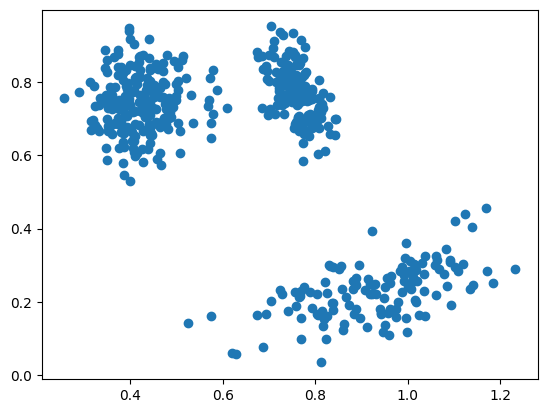

In [18]:
X = np.genfromtxt("2DGaussianMixture.csv", delimiter=",")
X = X[1:]
X = X[:,1:]
plt.scatter(X[:,0],X[:,1])
plt.show()

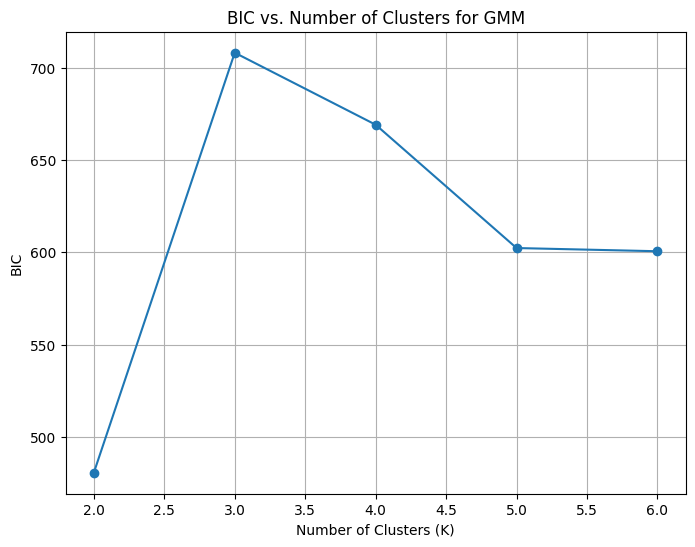

The optimal number of clusters is K = 3


In [19]:
# Q3.5 Your code starts here

class GaussianMixture:
    def __init__(self, n_components, max_iter=100, tol=1e-4, random_state=None):
        self.n_components = n_components  # Number of clusters
        self.max_iter = max_iter          # Maximum number of iterations
        self.tol = tol                    # Convergence tolerance
        self.random_state = random_state  # Random seed for reproducibility

    def initialize_parameters(self, X):
        np.random.seed(self.random_state)
        N, d = X.shape
        # Randomly initialize means, covariances, and mixing coefficients
        self.means_ = X[np.random.choice(N, self.n_components, replace=False)]
        self.covariances_ = np.array([np.eye(d)] * self.n_components)
        self.weights_ = np.ones(self.n_components) / self.n_components

    def compute_gaussian_pdf(self, X, mean, covariance):
        """
        Compute the multivariate Gaussian PDF for all data points in X.
        """
        d = X.shape[1]  # Dimensionality
        det_cov = np.linalg.det(covariance) + 1e-10  # Add small value to avoid numerical issues
        inv_cov = np.linalg.inv(covariance + 1e-10 * np.eye(d))  # Regularization for stability

        # Compute the exponent term
        diff = X - mean
        exponent = -0.5 * np.sum(np.dot(diff, inv_cov) * diff, axis=1)

        # Compute the normalization factor
        normalization = (2 * np.pi) ** (d / 2) * np.sqrt(det_cov)

        return np.exp(exponent) / normalization

    def e_step(self, X):
        N = X.shape[0]
        self.resp_ = np.zeros((N, self.n_components))  # Responsibilities matrix

        for k in range(self.n_components):
            self.resp_[:, k] = self.weights_[k] * self.compute_gaussian_pdf(X, self.means_[k], self.covariances_[k])

        # Normalize responsibilities to sum to 1 for each data point
        self.resp_ /= self.resp_.sum(axis=1, keepdims=True)

    def m_step(self, X):
        N = X.shape[0]

        # Update weights
        Nk = self.resp_.sum(axis=0)
        self.weights_ = Nk / N

        # Update means
        self.means_ = np.dot(self.resp_.T, X) / Nk[:, None]

        # Update covariances
        d = X.shape[1]
        self.covariances_ = np.zeros((self.n_components, d, d))
        for k in range(self.n_components):
            diff = X - self.means_[k]
            self.covariances_[k] = np.dot((self.resp_[:, k][:, None] * diff).T, diff) / Nk[k]

    def compute_log_likelihood(self, X):
        N = X.shape[0]
        log_likelihood = 0
        for k in range(self.n_components):
            pdf = self.compute_gaussian_pdf(X, self.means_[k], self.covariances_[k])
            log_likelihood += np.sum(self.resp_[:, k] * np.log(self.weights_[k] * pdf + 1e-10))
        return log_likelihood

    def fit(self, X):
        self.initialize_parameters(X)
        prev_log_likelihood = -np.inf

        for iteration in range(self.max_iter):
            self.e_step(X)  # Expectation step
            self.m_step(X)  # Maximization step
            log_likelihood = self.compute_log_likelihood(X)

            # Check for convergence
            if np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                break
            prev_log_likelihood = log_likelihood

    def score(self, X):
        self.e_step(X)  # Compute responsibilities for log-likelihood
        return self.compute_log_likelihood(X) / X.shape[0]

# Load the data
X = np.genfromtxt("2DGaussianMixture.csv", delimiter=",")[1:, 1:]
N, d = X.shape

# Define range of clusters to try
K_values = range(2, 7)
BIC_values = []

# Number of times to initialize GMM per K to avoid local optima
n_initializations = 5

# Loop over each value of K (number of clusters)
for K in K_values:
    best_bic = -np.inf  # Initialize best BIC for this K

    # Run multiple initializations to avoid local optima
    for _ in range(n_initializations):
        # Fit GMM with current K
        gmm = GaussianMixture(n_components=K, random_state=np.random.randint(0, 1000))
        gmm.fit(X)

        # Compute log-likelihood
        log_likelihood = gmm.score(X) * N

        # Calculate BIC
        d_K = (K - 1) + K * d + K * (d * (d + 1)) / 2
        bic = log_likelihood - (d_K / 2) * np.log(N)

        # Update best BIC for this K
        if bic > best_bic:
            best_bic = bic

    # Append the best BIC for this K to the list
    BIC_values.append(best_bic)

# Plot BIC values vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(K_values, BIC_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("BIC")
plt.title("BIC vs. Number of Clusters for GMM")
plt.grid()
plt.show()

# Determine optimal K based on maximum BIC
optimal_K = K_values[np.argmax(BIC_values)]
print(f"The optimal number of clusters is K = {optimal_K}")
